#### **Import Modules**

In [1]:
import csv
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
!pip install pyyaml==5.4.1
import plotly.express as px
import time
!pip install geopandas
!conda install somelibrary

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - somelibrary

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import seaborn as sns
from scipy import stats
import statistics
import geopandas as gpd

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [4]:
!pip install MarkupSafe==2.0.1

#### **Import Dataset and Generate Prelimiary Reports**

In [5]:
Dist_df_1=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")
Dist_df_2=pd.read_csv("02_District_wise_crimes_committed_against_ST_2013.csv")

Dist_df_crimes_final=pd.concat([Dist_df_1,Dist_df_2])
Dist_df_crimes_final

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,Lakshadweep,LAKSHADWEEP,2013,0,0,0,0,0,0,0,0,0,0
819,Lakshadweep,ZZ TOTAL,2013,0,0,0,0,0,0,0,0,0,0
820,Puducherry,KARAIKAL,2013,0,0,0,0,0,0,0,0,0,0
821,Puducherry,PUDUCHERRY,2013,0,0,0,0,0,0,0,0,0,0


In [6]:
Dist_df_crimes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 822
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9841 non-null   object
 1   DISTRICT                              9841 non-null   object
 2   Year                                  9841 non-null   int64 
 3   Murder                                9841 non-null   int64 
 4   Rape                                  9841 non-null   int64 
 5   Kidnapping Abduction                  9841 non-null   int64 
 6   Dacoity                               9841 non-null   int64 
 7   Robbery                               9841 non-null   int64 
 8   Arson                                 9841 non-null   int64 
 9   Hurt                                  9841 non-null   int64 
 10  Protection of Civil Rights (PCR) Act  9841 non-null   int64 
 11  Prevention of atrocities (POA) 

In [7]:
from pandas_profiling import ProfileReport

C:\Users\User\AppData\Local\Temp\ipykernel_2352\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [8]:
profile=ProfileReport(Dist_df_crimes_final, title="’Crimes against ST’", html={"style":{"full_width":True}})

#### **Check for the presence of 'NULL'  in the data**

In [9]:
Dist_df_crimes_final.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping Abduction                    0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

#### **Dataset Minor Modifications**

In [10]:
Dist_df_crimes_final.shape

(9841, 13)

In [11]:
for x in Dist_df_crimes_final["DISTRICT"].unique():
  if "total" in str(x).lower():
    Dist_df_crimes_final=Dist_df_crimes_final.drop(list(Dist_df_crimes_final[Dist_df_crimes_final["DISTRICT"]==x].index))

In [12]:
Dist_df_crimes_final.shape

(9312, 13)

In [13]:
#add Cols
Dist_df_crimes_final["Total"]=Dist_df_crimes_final["Murder"]
for x in range(4,len(Dist_df_crimes_final.columns)-1):
  Dist_df_crimes_final["Total"]+=Dist_df_crimes_final[Dist_df_crimes_final.columns[x]]

In [14]:
Dist_df_crimes_final

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0,2
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Delhi UT,STF,2013,0,0,0,0,0,0,0,0,0,0,0
816,Delhi UT,WEST,2013,0,0,0,0,0,0,0,0,0,0,0
818,Lakshadweep,LAKSHADWEEP,2013,0,0,0,0,0,0,0,0,0,0,0
820,Puducherry,KARAIKAL,2013,0,0,0,0,0,0,0,0,0,0,0


#### **General Geomap Observation**

In [15]:
df_geo_total=Dist_df_crimes_final[['STATE/UT','Total']]
df_geo_total

,STATE/UT,Total
0,ANDHRA PRADESH,18
1,ANDHRA PRADESH,14
2,ANDHRA PRADESH,2
3,ANDHRA PRADESH,4
4,ANDHRA PRADESH,14
...,...,...
815,Delhi UT,0
816,Delhi UT,0
818,Lakshadweep,0
820,Puducherry,0


In [16]:
shp_gdf = gpd.read_file("India_State_Boundary.shp")

In [17]:
shp_gdf.head(5)

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [18]:
merge =shp_gdf.set_index('State_Name').join(df_geo_total.set_index('STATE/UT'))
merge

,geometry,Total
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",NaN
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",40.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",13.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",0.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",30.0
...,...,...
West Bengal,"POLYGON ((9800305.279 3151090.311, 9800377.779...",0.0
West Bengal,"POLYGON ((9800305.279 3151090.311, 9800377.779...",1.0
West Bengal,"POLYGON ((9800305.279 3151090.311, 9800377.779...",0.0
West Bengal,"POLYGON ((9800305.279 3151090.311, 9800377.779...",0.0


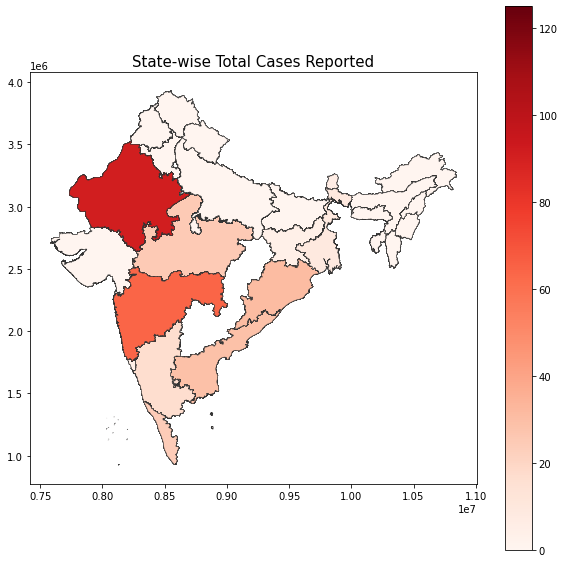

In [19]:
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('State-wise Total Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Total', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#### **Yearly Analysis**

Text(0.5, 1.0, 'No of Cases vs Year')

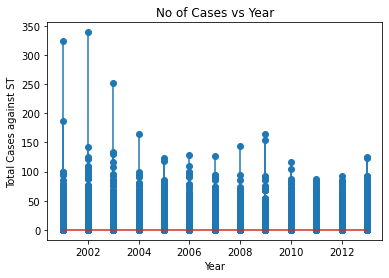

In [20]:
plt.stem(Dist_df_crimes_final.Year,Dist_df_crimes_final.Total)
plt.ylabel('Total Cases against ST')   
plt.xlabel('Year')
plt.title('No of Cases vs Year')

<AxesSubplot:xlabel='Year'>

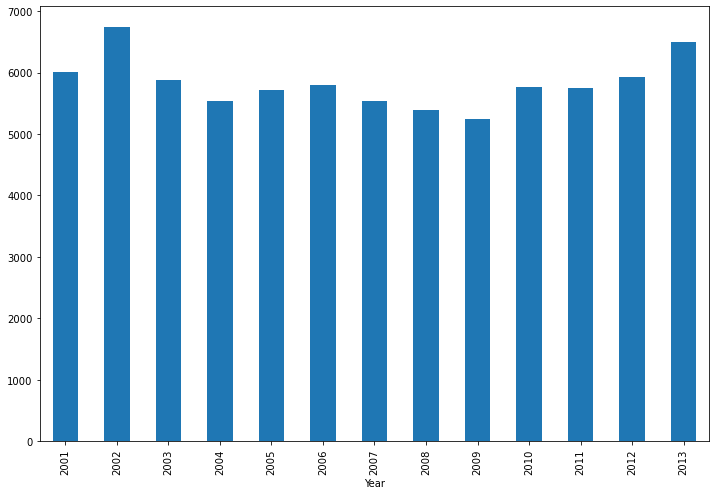

In [21]:
plt.figure(figsize=(12,8))
Dist_df_crimes_final.groupby("Year")["Total"].sum().plot.bar()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


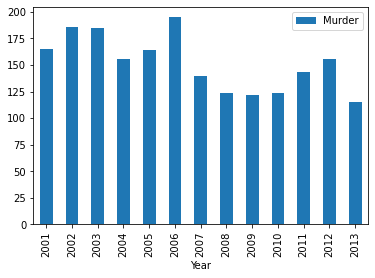

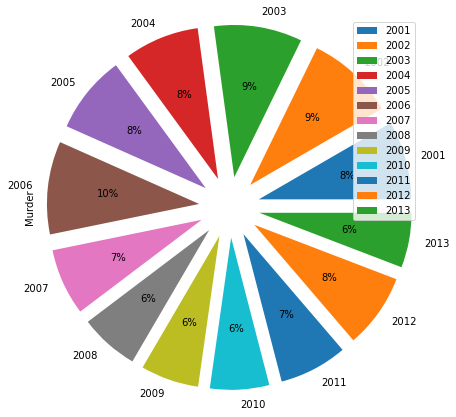

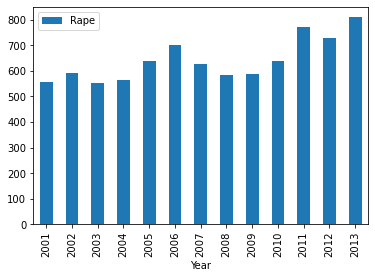

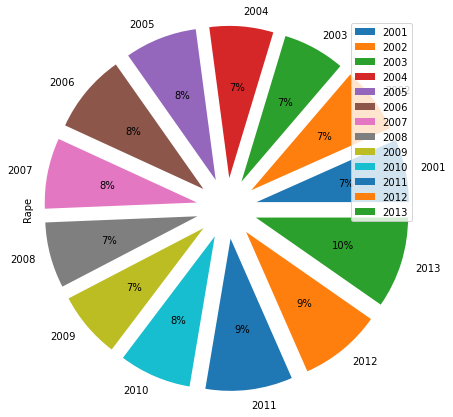

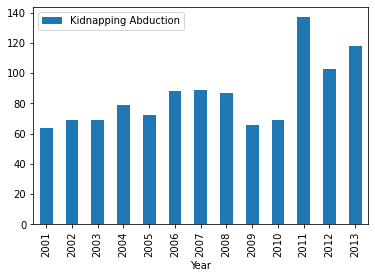

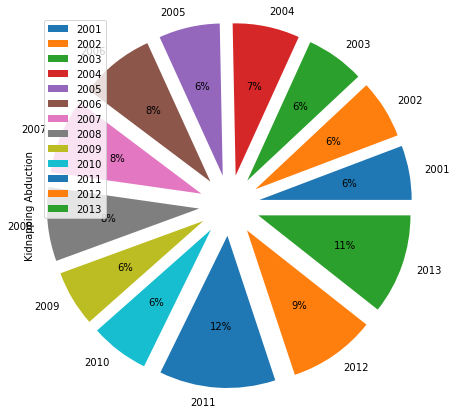

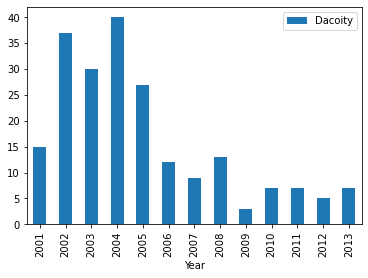

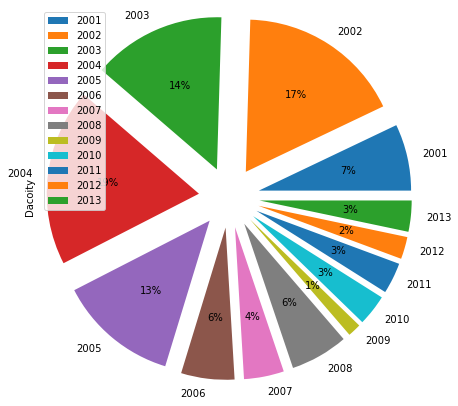

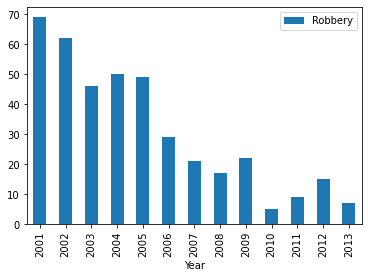

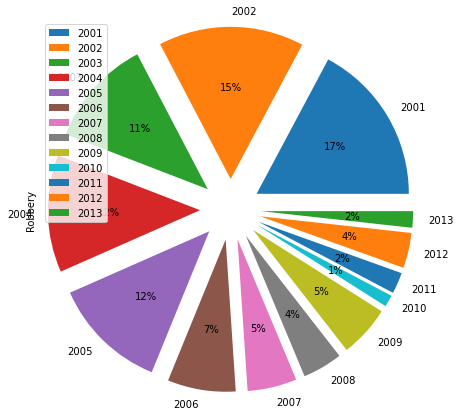

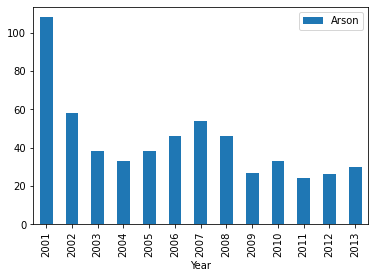

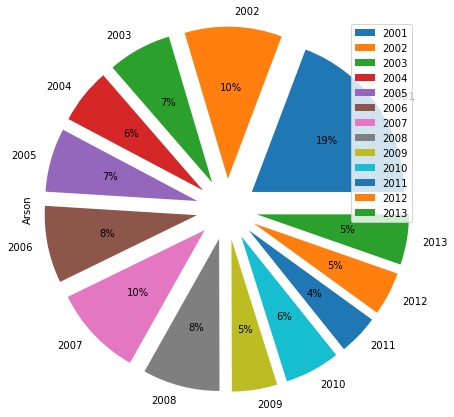

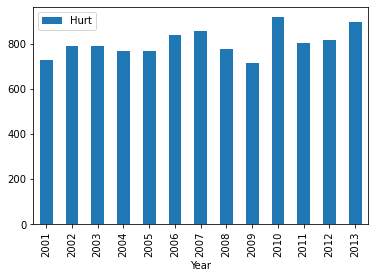

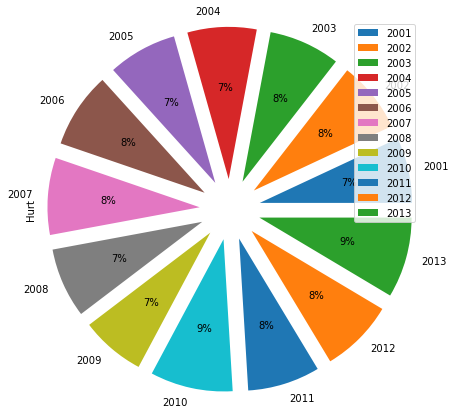

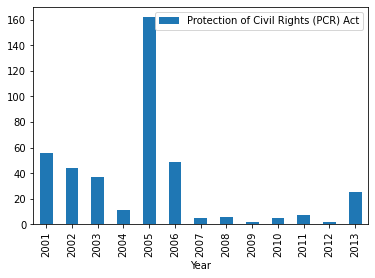

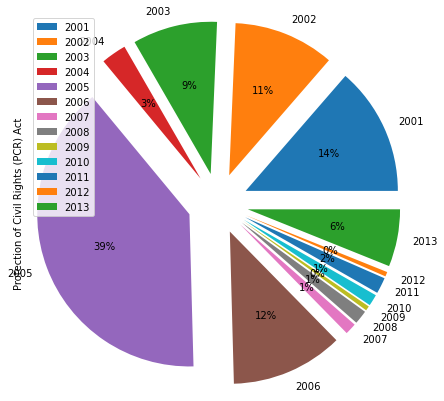

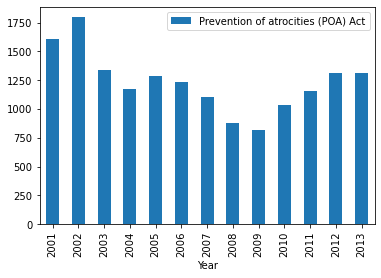

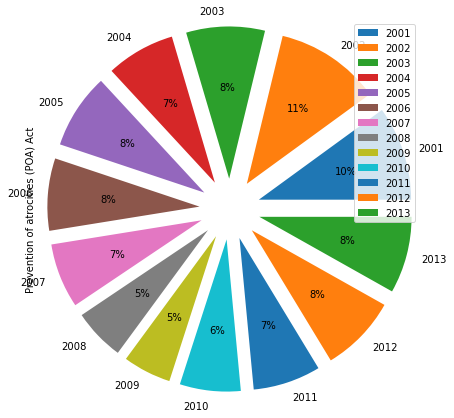

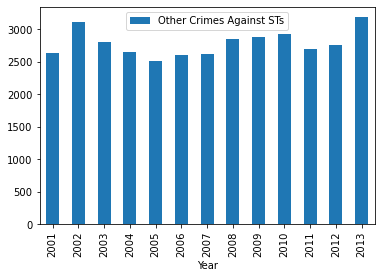

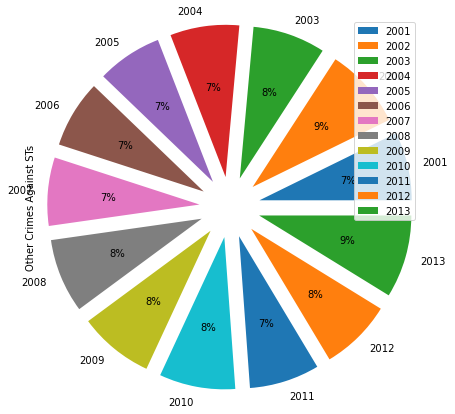

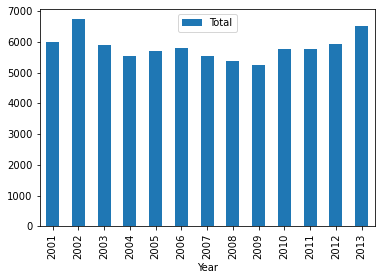

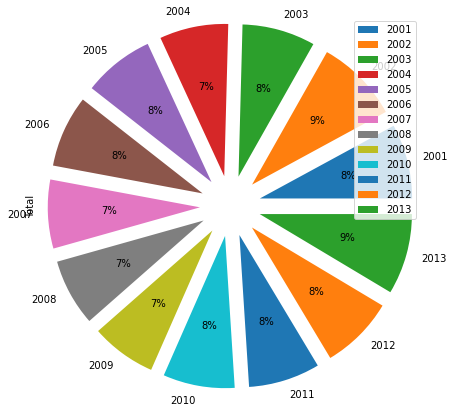

In [22]:
explode=[0.2 for x in range(len(Dist_df_crimes_final['Year'].unique()))]
for col in range(3,len(Dist_df_crimes_final.columns)):
  Dist_df_crimes_final.groupby(['Year']).sum().plot(kind='bar', y=Dist_df_crimes_final.columns[col])
  Dist_df_crimes_final.groupby(['Year']).sum().plot(kind='pie', y=Dist_df_crimes_final.columns[col],explode=explode,figsize=(7,7),autopct='%1.0f%%')

### Categorical yearly crime rates

In [23]:
crimes=Dist_df_crimes_final.columns[3:-1]
Dist_df_crimes_sub=pd.DataFrame()
for i in crimes:
    df_c=Dist_df_crimes_final.groupby(['Year'])[i].sum()
    Dist_df_crimes_sub[i]=df_c
Dist_df_crimes_sub

,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
Year,,,,,,,,,,
2001,165,558,64,15,69,108,727,56,1609,2634
2002,186,590,69,37,62,58,788,44,1797,3108
2003,185,551,69,30,46,38,790,37,1340,2798
2004,156,566,79,40,50,33,767,11,1175,2658
2005,164,640,72,27,49,38,767,162,1283,2511
2006,195,701,88,12,29,46,840,49,1232,2604
2007,140,627,89,9,21,54,855,5,1104,2628
2008,124,585,87,13,17,46,777,6,882,2855
2009,122,589,66,3,22,27,715,2,822,2882


### Percentage Distribution of crime type

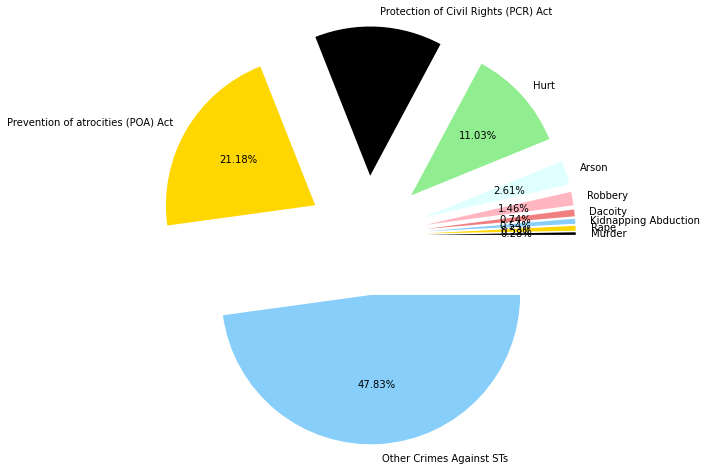

In [24]:
a=[]
explode=[]
for i in crimes:
  a.append(Dist_df_crimes_sub[i].sum())
  explode.append(0.4)
a.sort()
plt.figure(figsize=(10,10))
plt.pie(a,labels=crimes,autopct='%1.2f%%',explode=explode,colors=['black', 'gold', 'lightskyblue', 'lightcoral','lightpink','lightcyan','lightgreen'])
plt.tight_layout()

In [25]:
Dist_df_crimes_sub.T

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Murder,165,186,185,156,164,195,140,124,122,124,143,156,115
Rape,558,590,551,566,640,701,627,585,589,640,772,729,810
Kidnapping Abduction,64,69,69,79,72,88,89,87,66,69,137,103,118
Dacoity,15,37,30,40,27,12,9,13,3,7,7,5,7
Robbery,69,62,46,50,49,29,21,17,22,5,9,15,7
Arson,108,58,38,33,38,46,54,46,27,33,24,26,30
Hurt,727,788,790,767,767,840,855,777,715,917,803,816,895
Protection of Civil Rights (PCR) Act,56,44,37,11,162,49,5,6,2,5,7,2,25
Prevention of atrocities (POA) Act,1609,1797,1340,1175,1283,1232,1104,882,822,1037,1154,1311,1309
Other Crimes Against STs,2634,3108,2798,2658,2511,2604,2628,2855,2882,2927,2700,2759,3187


## State / UT wise Analysis of Crime

<AxesSubplot:xlabel='STATE/UT'>

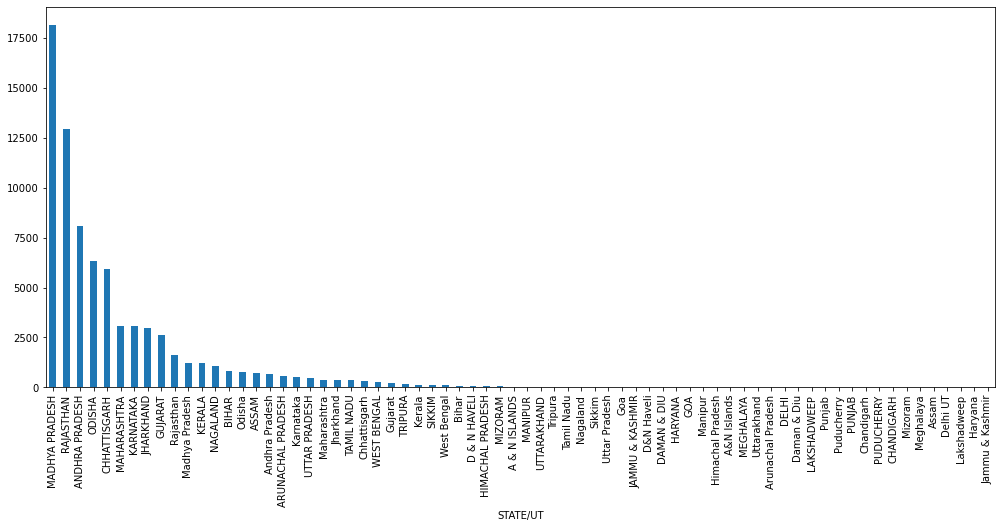

In [26]:
plt.figure(figsize=(17,7))
Dist_df_crimes_final.groupby("STATE/UT")["Total"].sum().sort_values(ascending=False).plot.bar()

In [27]:
df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=Dist_df_crimes_final.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes
df_state["Total"]=df_state.sum(axis=1)
df_state=df_state.sort_values(by="Total",ascending=False)
df_state.reset_index()
df_state

,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total
STATE/UT,,,,,,,,,,,
MADHYA PRADESH,537,3342,267,6,23,115,2776,3,1683,9390,18142
RAJASTHAN,180,471,71,0,9,113,1391,0,1974,8740,12949
ANDHRA PRADESH,99,451,48,0,3,19,1283,116,2525,3534,8078
ODISHA,106,428,81,6,38,41,985,4,2707,1954,6350
CHHATTISGARH,220,1132,63,16,9,19,620,5,930,2910,5924
...,...,...,...,...,...,...,...,...,...,...,...
Assam,0,0,0,0,0,0,0,0,0,0,0
Delhi UT,0,0,0,0,0,0,0,0,0,0,0
Lakshadweep,0,0,0,0,0,0,0,0,0,0,0


### Top 3 States with Higher Number of Crimes

In [28]:
df_state.head(3)

,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total
STATE/UT,,,,,,,,,,,
MADHYA PRADESH,537,3342,267,6,23,115,2776,3,1683,9390,18142
RAJASTHAN,180,471,71,0,9,113,1391,0,1974,8740,12949
ANDHRA PRADESH,99,451,48,0,3,19,1283,116,2525,3534,8078


### 3 States with lower Number of Crimes

In [29]:
df_state.tail(3)

,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total
STATE/UT,,,,,,,,,,,
Lakshadweep,0,0,0,0,0,0,0,0,0,0,0
Haryana,0,0,0,0,0,0,0,0,0,0,0
Jammu & Kashmir,0,0,0,0,0,0,0,0,0,0,0


### Top 5 States Analysis of each Crime

In [30]:
crimes

Index(['Murder', 'Rape', 'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson',
       'Hurt', 'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

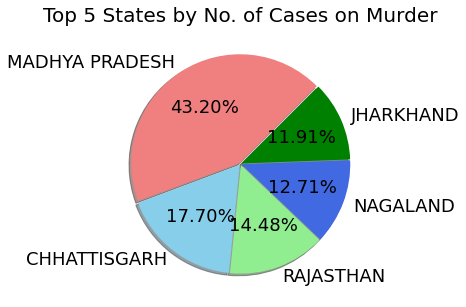

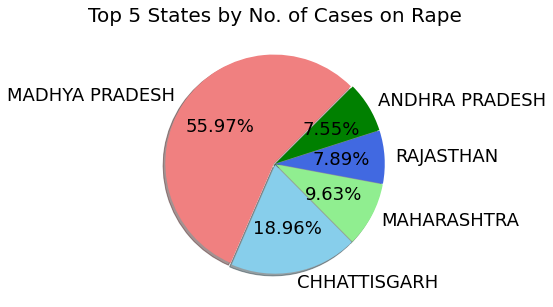

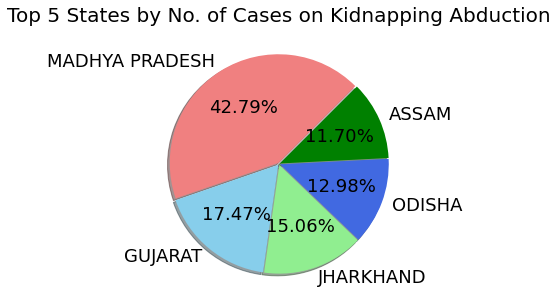

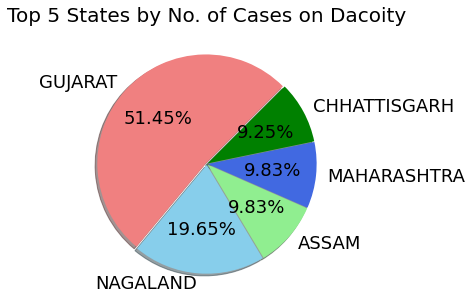

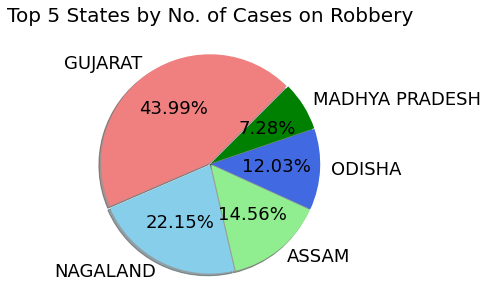

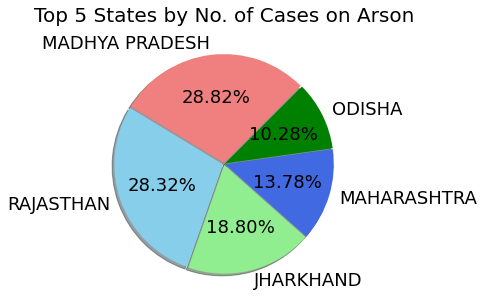

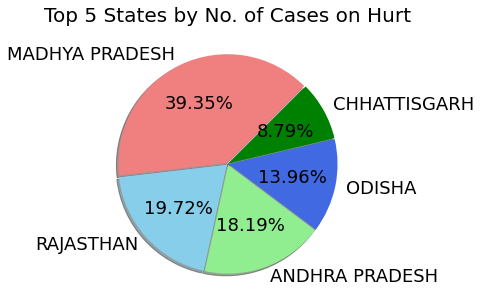

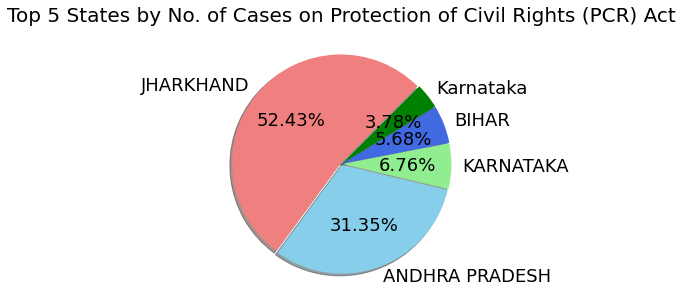

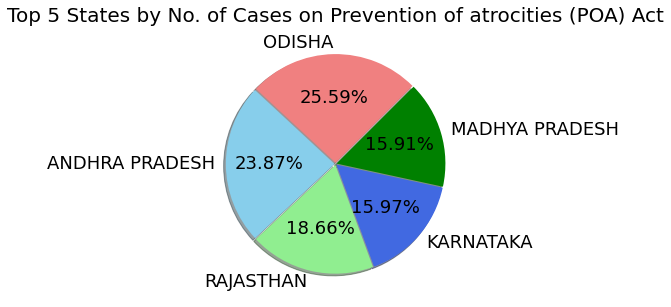

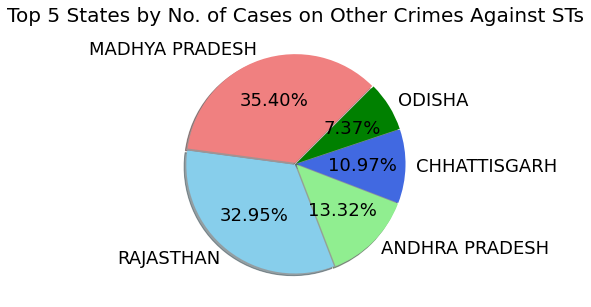

In [31]:
count=-1
for crime in crimes:
  count+=1
  top_crime_by_state=df_state.sort_values(by=crime,ascending=False)
  top_3crime=top_crime_by_state.iloc[:,count:count+1].head(5)
  plt.figure(figsize=(10,5))
  plt.pie(top_3crime[crime],labels=top_3crime.index,colors=['lightcoral','skyblue','lightgreen',"royalblue","green"],startangle=45,autopct='%1.2f%%',textprops={'fontsize': 18},shadow=True,explode=[0.01,0.01,0.01,0.01,0.01])
  plt.title("Top 5 States by No. of Cases on "+crime,fontdict={'fontsize' : 20})
  #plt.tight_layout()

## Analysis of Top 5 States

In [32]:
top_5states=df_state.head(5).index
print(top_5states)

Index(['MADHYA PRADESH', 'RAJASTHAN', 'ANDHRA PRADESH', 'ODISHA',
       'CHHATTISGARH'],
      dtype='object', name='STATE/UT')


STATE/UT                              MADHYA PRADESH
Murder                                           537
Rape                                            3342
Kidnapping Abduction                             267
Dacoity                                            6
Robbery                                           23
Arson                                            115
Hurt                                            2776
Protection of Civil Rights (PCR) Act               3
Prevention of atrocities (POA) Act              1683
Other Crimes Against STs                        9390 

            STATE/UT   DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
303   MADHYA PRADESH   BALAGHAT  2001       1     6                     0   
304   MADHYA PRADESH    BARWANI  2001       2     3                     0   
305   MADHYA PRADESH      BETUL  2001       0    15                     0   
306   MADHYA PRADESH      BHIND  2001       0     1                     0   
307   MADHYA PRADESH     BHOPA

STATE/UT                              ANDHRA PRADESH
Murder                                            99
Rape                                             451
Kidnapping Abduction                              48
Dacoity                                            0
Robbery                                            3
Arson                                             19
Hurt                                            1283
Protection of Civil Rights (PCR) Act             116
Prevention of atrocities (POA) Act              2525
Other Crimes Against STs                        3534 

            STATE/UT        DISTRICT  Year  Murder  Rape  \
0     ANDHRA PRADESH        ADILABAD  2001       0     1   
1     ANDHRA PRADESH       ANANTAPUR  2001       0     0   
2     ANDHRA PRADESH        CHITTOOR  2001       0     0   
3     ANDHRA PRADESH        CUDDAPAH  2001       0     0   
4     ANDHRA PRADESH   EAST GODAVARI  2001       0     0   
...              ...             ...   ...     ...   ..

C:\Users\User\AppData\Local\Temp\ipykernel_2352\4142895521.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


STATE/UT                              CHHATTISGARH
Murder                                         220
Rape                                          1132
Kidnapping Abduction                            63
Dacoity                                         16
Robbery                                          9
Arson                                           19
Hurt                                           620
Protection of Civil Rights (PCR) Act             5
Prevention of atrocities (POA) Act             930
Other Crimes Against STs                      2910 

          STATE/UT     DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
116   CHHATTISGARH    BALRAMPUR  2001       0     0                     0   
117   CHHATTISGARH     BILASPUR  2001       3     7                     1   
118   CHHATTISGARH      BIZAPUR  2001       0     0                     0   
119   CHHATTISGARH    DANTEWARA  2001       0     5                     1   
120   CHHATTISGARH     DHAMTARI  2001       0     0 

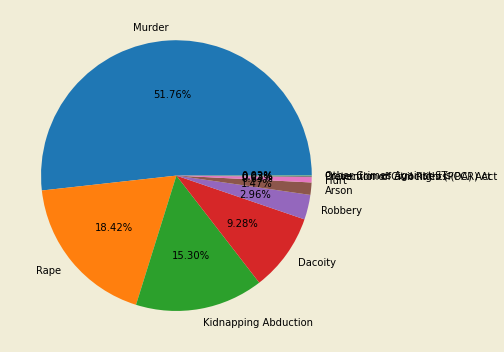

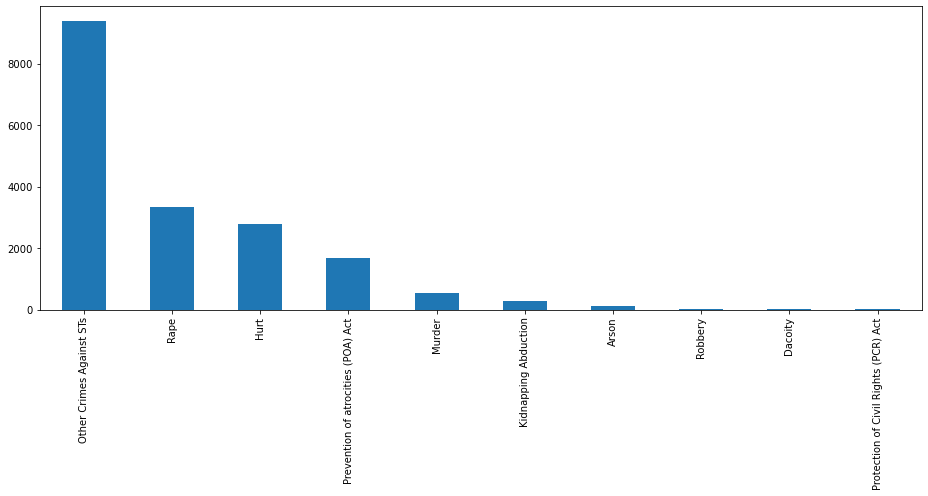

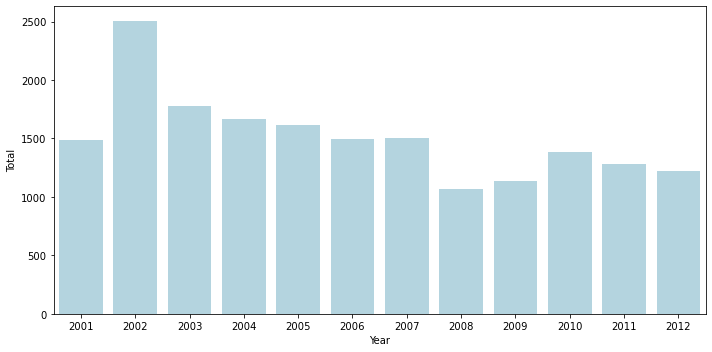

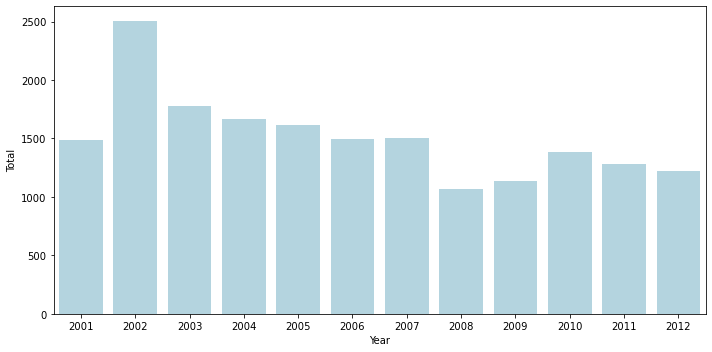

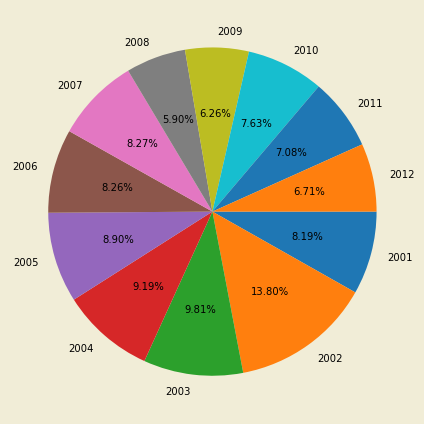

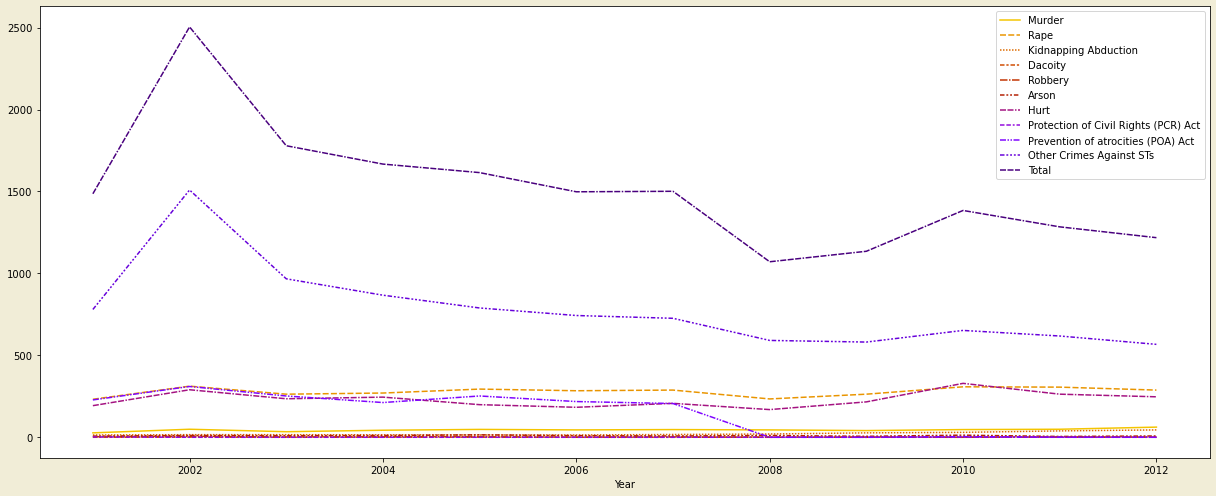

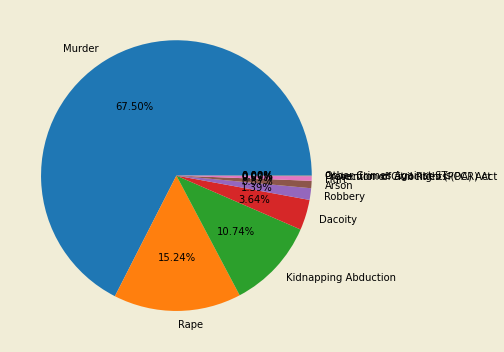

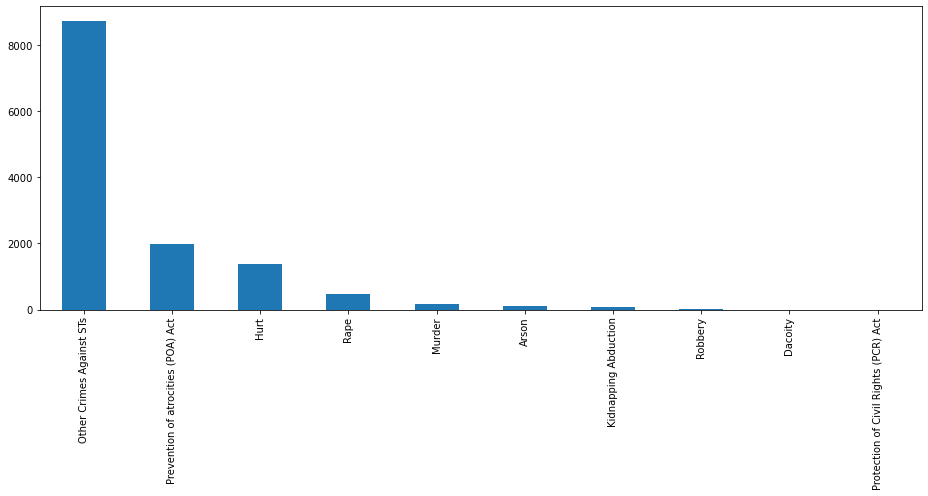

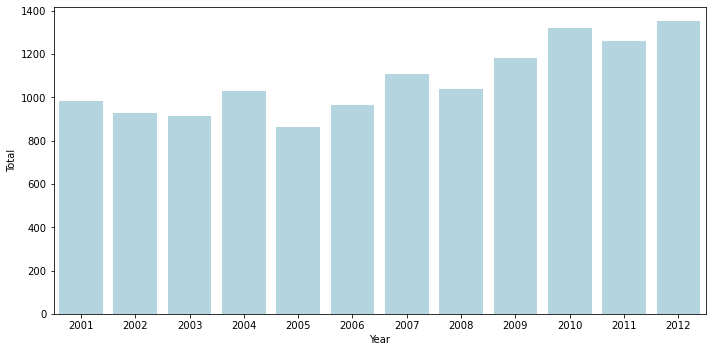

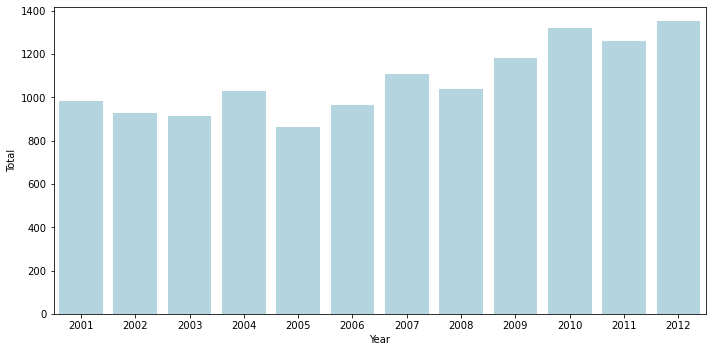

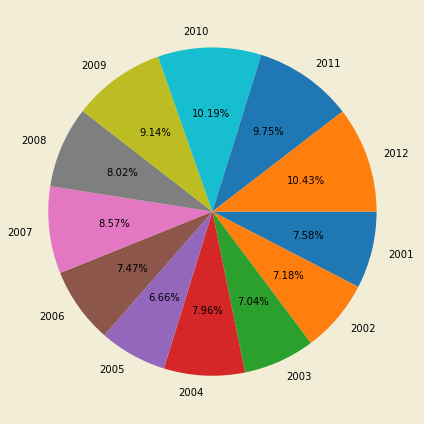

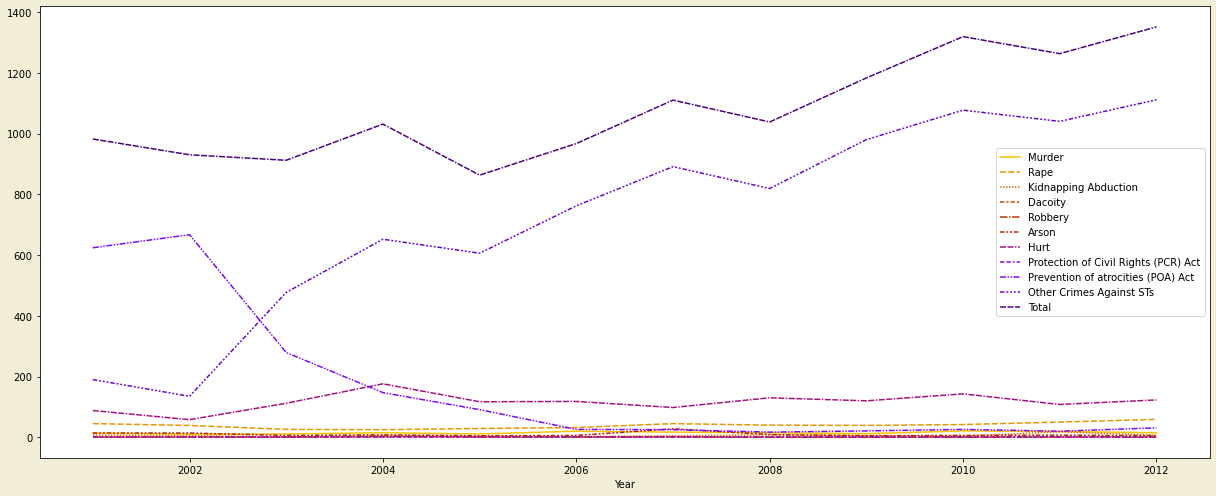

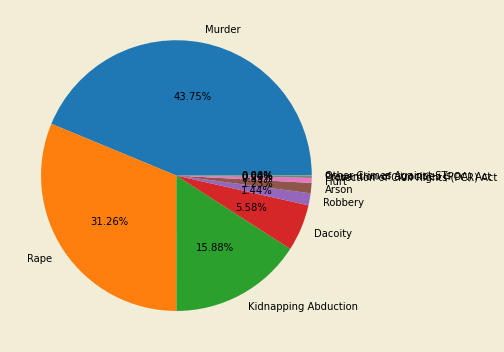

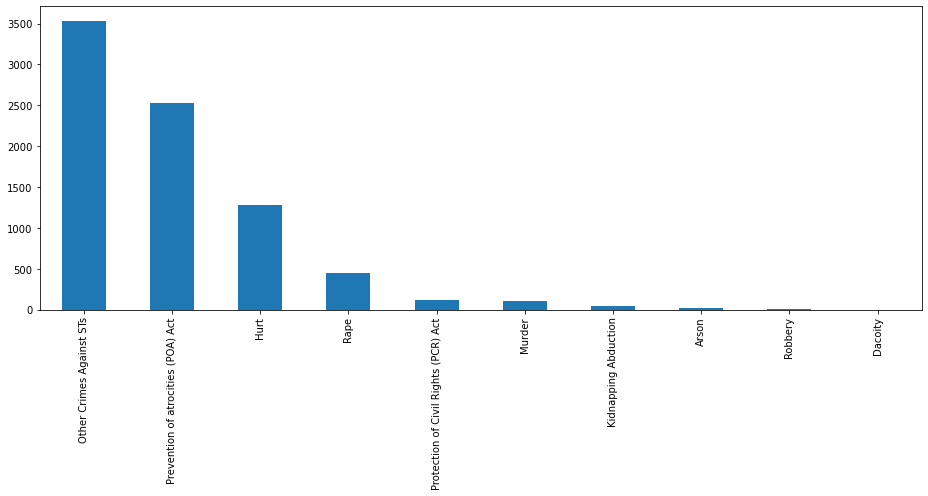

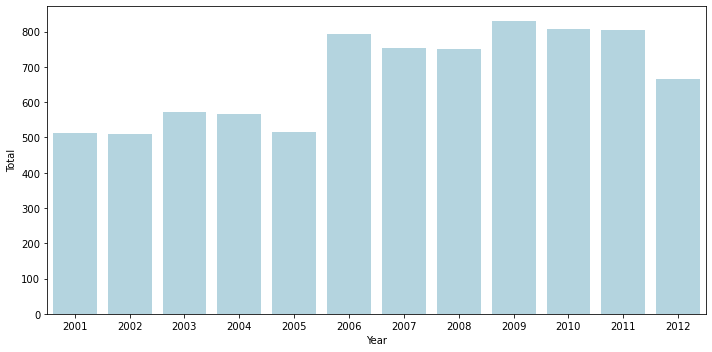

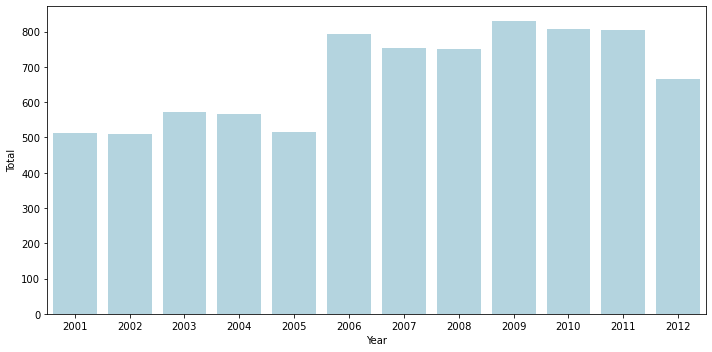

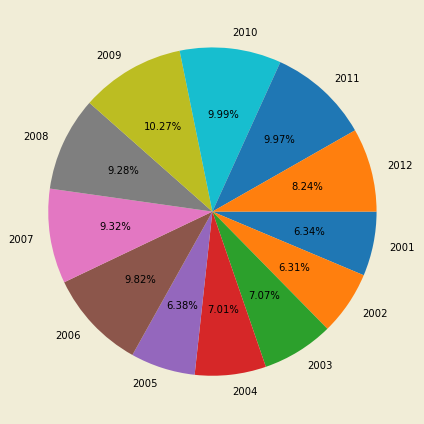

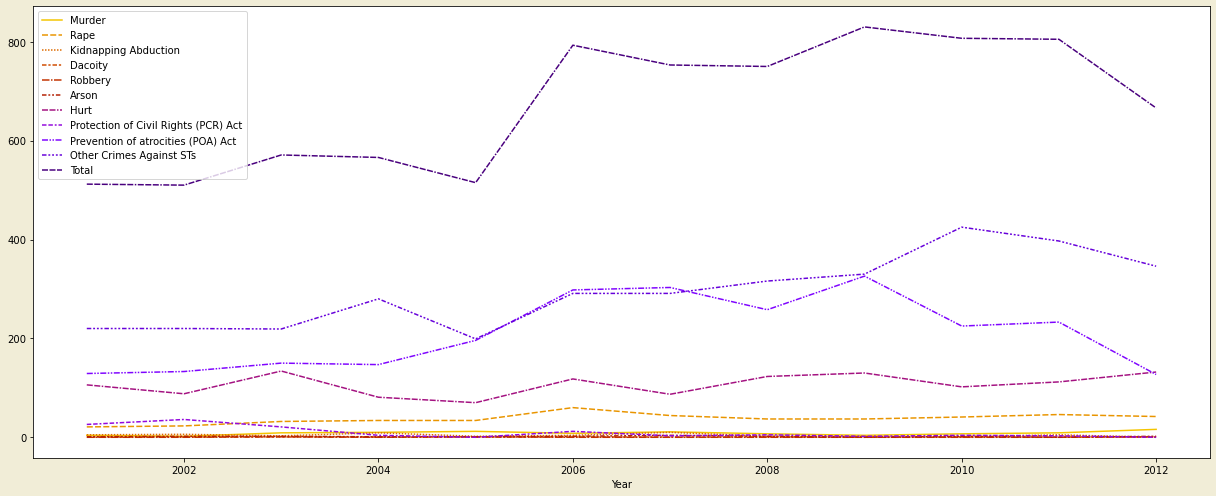

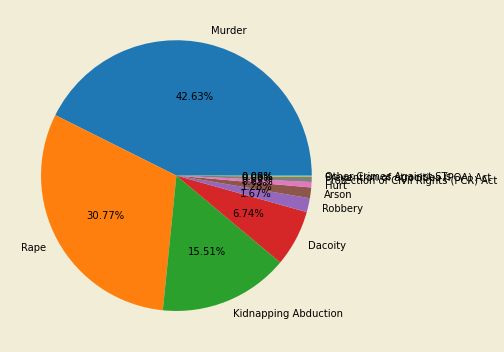

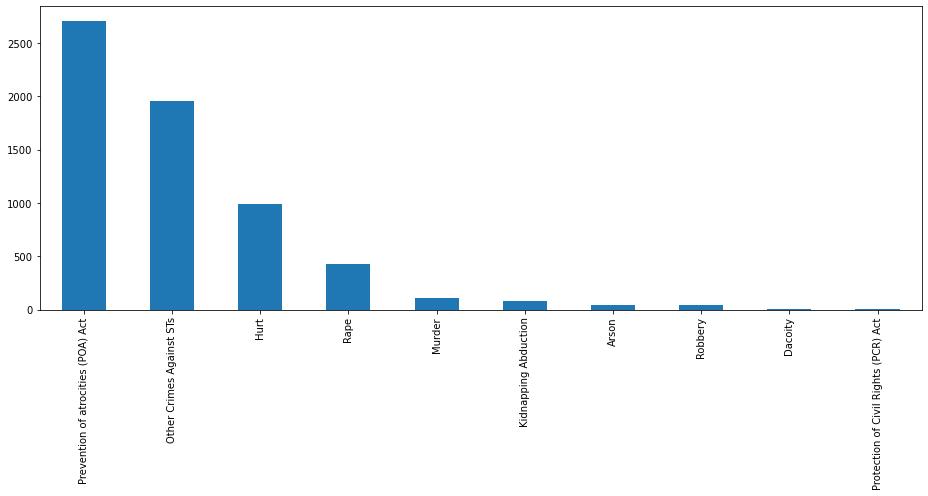

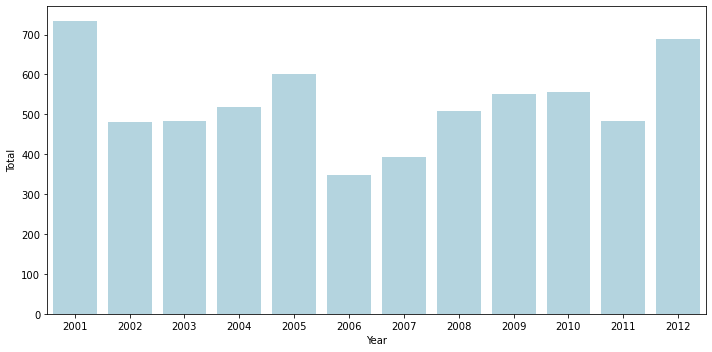

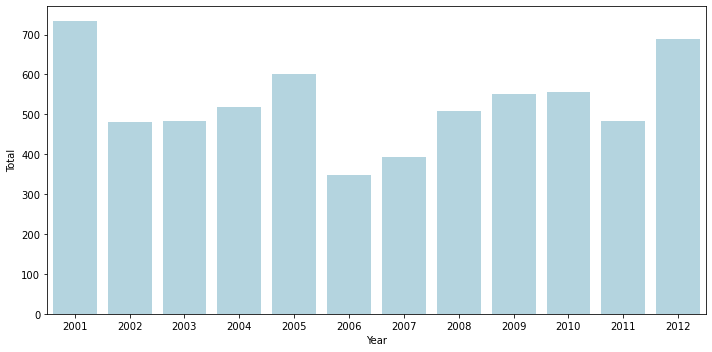

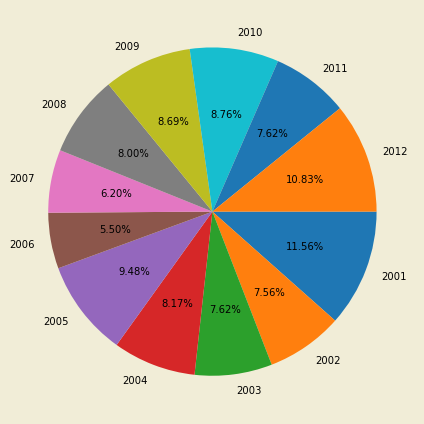

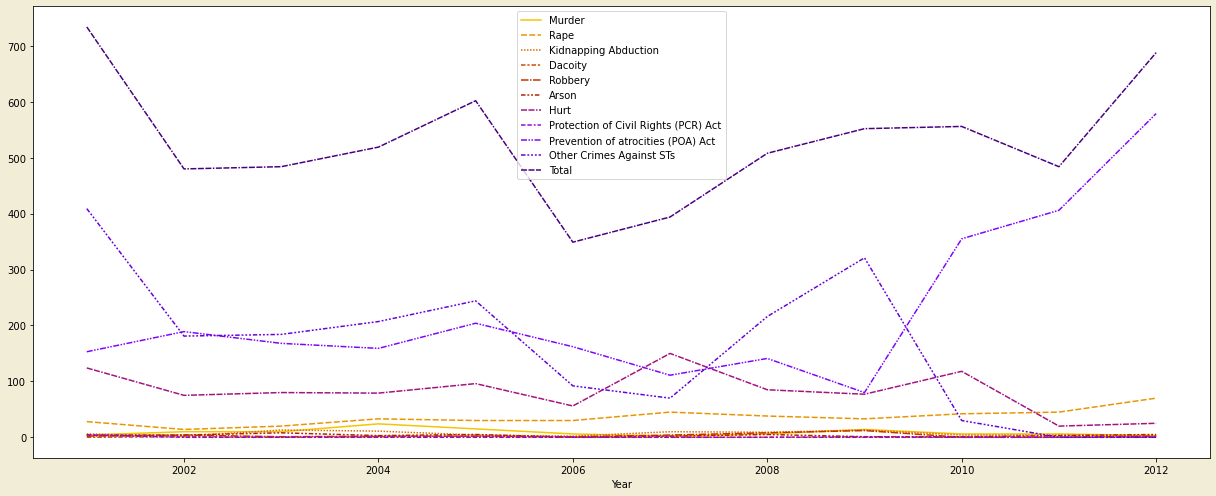

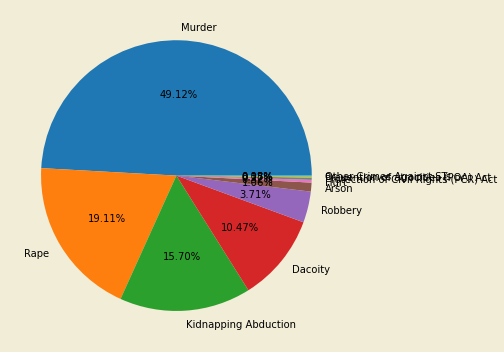

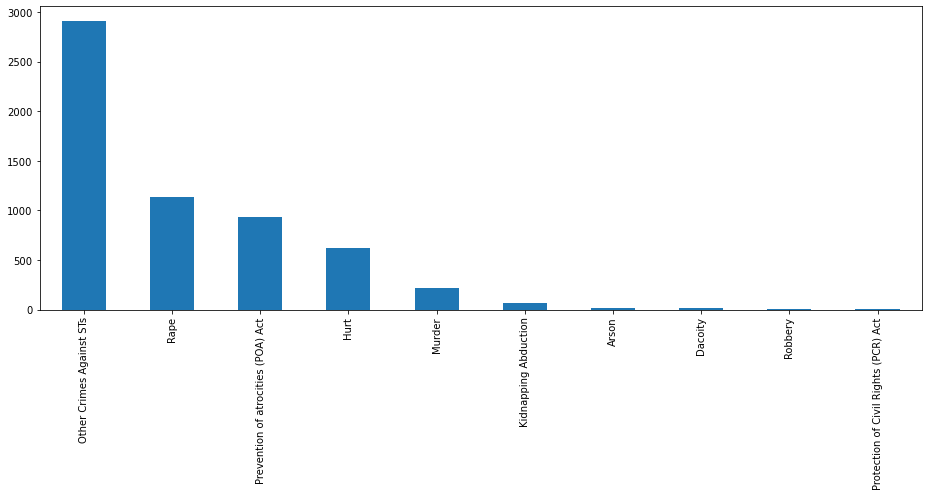

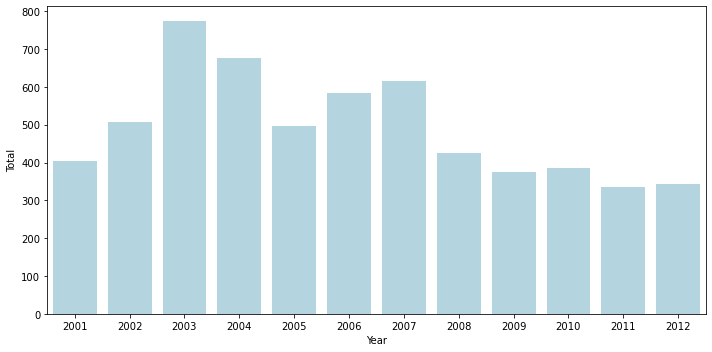

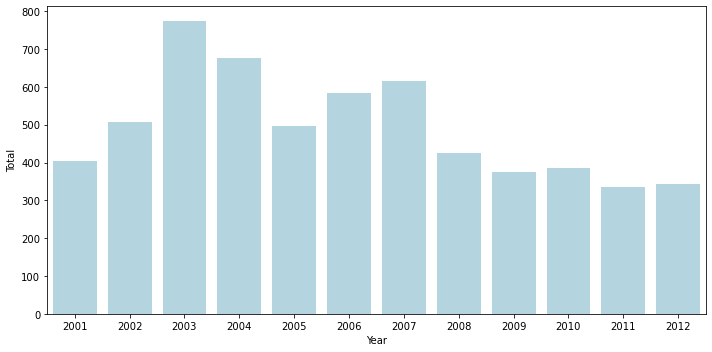

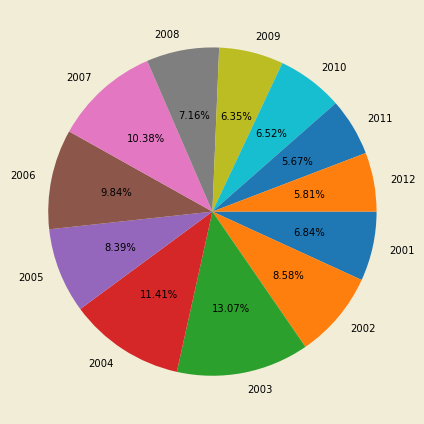

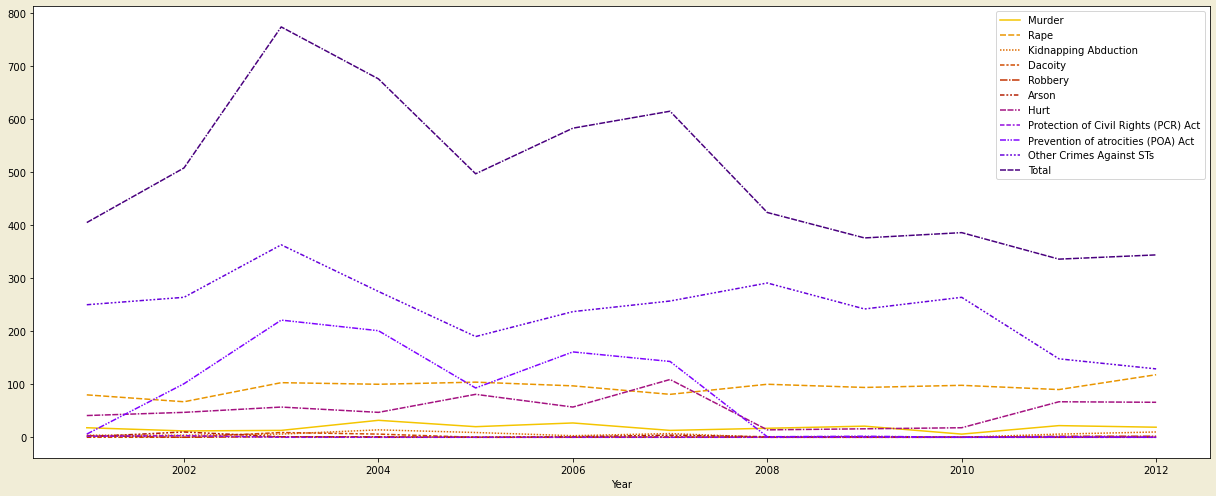

In [33]:
for state in top_5states:
  df_up=df_state.loc[df_state.index==state]
  dfupT=df_up.T.drop("Total")
  print(dfupT,"\n")

  #Percentage Distribution of Crimes in Uttar Pradesh from 2001 to 2014
  plt.figure(figsize=(12,5)).patch.set_facecolor("#F1EDD7FF")
  plt.pie(dfupT[state].sort_values(ascending=False),labels=dfupT.index,autopct='%1.2f%%')
  plt.tight_layout()

  plt.figure(figsize=(13,7))
  dfupT.groupby(dfupT.index)[state].sum().sort_values(ascending=False).plot.bar()
  plt.tight_layout()

  df_state_year=Dist_df_crimes_final.loc[Dist_df_crimes_final['STATE/UT']==state]
  print(df_state_year,"\n")

  #Year Wise Distribution of Crimes in Uttar Pradesh
  df1_up_yearwise=pd.DataFrame()
  crimes_col=[x for x in crimes]
  crimes_col.append("Total")
  for i in crimes_col:
      df_crimes_up=df_state_year.groupby(['Year'])[i].sum()
      df1_up_yearwise[i]=df_crimes_up
  print(df1_up_yearwise)

  plt.figure(figsize=(10,5))
  sns.barplot(data=df1_up_yearwise,x=df1_up_yearwise.index,y='Total',color="lightblue")
  plt.tight_layout()
  
  
  plt.figure(figsize=(10,5))
  sns.barplot(data=df1_up_yearwise,x=df1_up_yearwise.index,y='Total',color="lightblue")
  plt.tight_layout()

  plt.figure(figsize=(13,6)).patch.set_facecolor("#F1EDD7FF")
  plt.pie(df1_up_yearwise["Total"],labels=df1_up_yearwise.index,autopct='%1.2f%%',counterclock=False)
  plt.tight_layout()

  #Timeline Analysis of Different Categories of Crime at Different Period of Time
  plt.figure(figsize=(17,7)).patch.set_facecolor("#F1EDD7FF")
  sns.lineplot(data=df1_up_yearwise,palette='gnuplot_r',linestyle="dashed")
  plt.tight_layout()
